# Clase 8 - preparativo parcial

El objetivo de esta clase es dar un repaso de lo visto en el curso hasta la fecha, donde se aplicarán múltiples estrategias de clúster y como se puede asociar a la industria. Además de entender la estructura del parcial y metodología de evaluación.





In [ ]:
!pip install scikit-learn-extra
from google.colab import drive # conexión con drive
drive.mount('/content/drive')
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
from sklearn.cluster import (KMeans, DBSCAN, AgglomerativeClustering)
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # estandarizar variables.
from sklearn.ensemble import IsolationForest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.5 MB/s eta 0:00:00
Mounted at /content/drive


# Caso de negocio


Con la creciente competencia en el mercado inmobiliario de Nueva York, es fundamental para las empresas del sector identificar oportunidades de mercado y mejorar sus estrategias comerciales.

En el mercado inmobiliario de Nueva York, la diversidad de propiedades disponibles presenta un desafío para los agentes inmobiliarios al momento de especializarse y maximizar sus ventas. La venta de una casa costosa con pocas habitaciones difiere significativamente de una casa económica con múltiples habitaciones, lo que resalta la importancia de la especialización. A través de la creación de segmentos de casas basados en características clave como precio, tamaño, número de habitaciones y ubicación, se busca asignar a los agentes inmobiliarios a segmentos específicos que se alineen con sus habilidades y conocimientos, optimizando así sus esfuerzos de venta y potenciando su éxito en un mercado tan diverso y competitivo como el de Nueva York.

Para esto se tienen información demográfica, comportamiento de gastos, niveles de satisfacción e información de campañas.

Description of Columns:

* BROKERTITLE: Title of the broker.

* TYPE: Type of the house.

* PRICE: Price of the house.

* BEDS: Number of bedrooms.

* BATH: Number of bathrooms.

* PROPERTYSQFT: Square footage of the property.

* ADDRESS: Full address of the house.

* STATE: State of the house.

* MAIN_ADDRESS: Main address information.

* ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information.

* LOCALITY: Locality information.

* SUBLOCALITY: Sublocality information.

* STREET_NAME: Street name.

* LONG_NAME: Long name.

* FORMATTED_ADDRESS: Formatted address.

* LATITUDE: Latitude coordinate of the house.

* LONGITUDE: Longitude coordinate of the house.

# Metodología

Para este tipo de problema debemos entender el problema y las expectativas del negocio.






## Problema del negocio

Crear segmentos de casa para asignar agentes inmobiliarios.



## Entender los datos

Para resolver este problema debemos analizar los datos y verificar que estos están alineados con el problema del negocio.



In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Aprendizaje no supervisado/Base de datos/NY-House-Dataset.csv")
datos

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Tenemos información mucha información que representa la ubicación de la casa, sin embargo, ¿de dicha información cuál es la más relevante?

Muchas de ellos son componentes de la dirección, pero esta es casi única para todas las casas, lo que nos puede servir es la posición geográfica.




In [ ]:

fig = px.scatter_mapbox(datos, lat="LATITUDE", lon="LONGITUDE", #hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["blue"], zoom=9, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Es importante conocer la ubicación de los agentes inmobiliarios, ya que estos deben estar ubicados en puntos estratégicos, por esto dichas variables van a ser utilizadas para segmentación.

¿Qué otras variables podemos analizar?

El precio, habitaciones, baños, cantidad de metros cuadrados y el tipo de vivienda.



In [ ]:
datos.describe() # Resumen variables númericas

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


##  Detección de atípicos

Haciendo un resumen estadístico, observamos que hay casas con un precio elevado, un orden de $10^9$ ¿será algo normal?

Uno asume que a mayor sea la cantidad de metros cuadrados, mayor es el valor de la casa. ¿Qué sucede?


<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

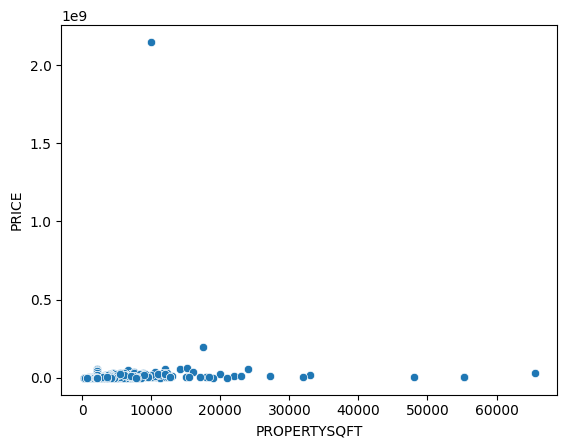

In [ ]:
sns.scatterplot(datos, x="PROPERTYSQFT", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='PRICE'>

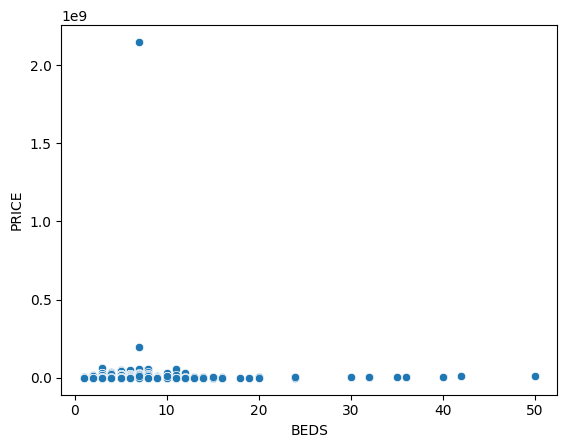

In [ ]:
sns.scatterplot(datos, x="BEDS", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='BATH'>

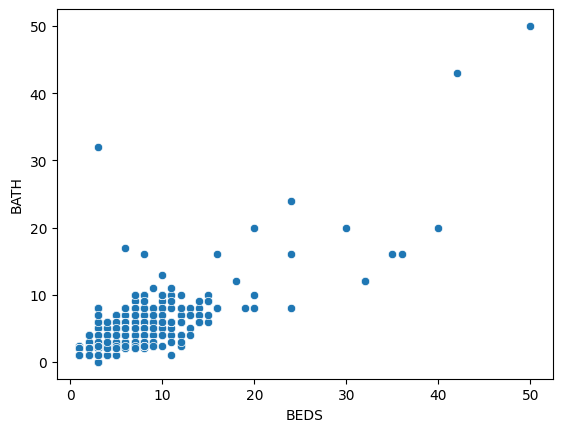

In [ ]:
sns.scatterplot(datos, x="BEDS", y="BATH" )

<Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>

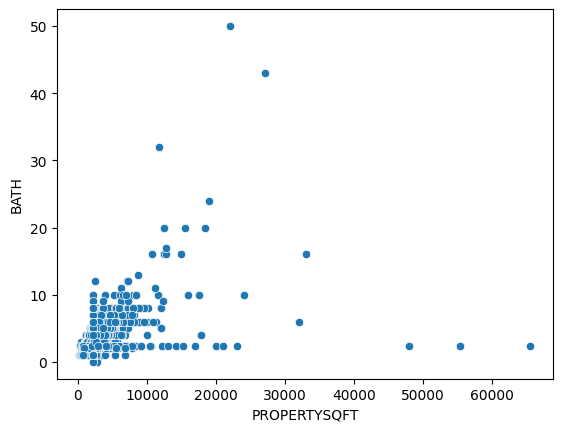

In [ ]:
sns.scatterplot(datos, x="PROPERTYSQFT", y="BATH" )

### Isolation Forest

Si observamos, la casa más costosa no tiene una cantidad de metros cuadrados alto, parece estar en el promedio, y su escala es demasiado alta, esto podría considerarse un dato atípico. Qué pasa si utilizamos una técnica para detección de atípicos.

IsolationForest es una técnica de aprendizaje supervisado y no supervisado que se utiliza comúnmente en detección de animalias, pero también sirve para la detección de datos atípicos cuanto tenemos múltiples variables. Tiene un parámetro que es contamination, donde se aproxima a la proporción de atípicos que asumimos tienen los datos.

Para este caso se puede considerar una cantidad de atípicos pequeña, menor al 1%.

In [ ]:
datos_numericos =datos[['PRICE',	'BEDS',	'BATH',	'PROPERTYSQFT',	'LATITUDE',	'LONGITUDE' ]]
scaler = StandardScaler() # Función de estandarización
datos_numericos = scaler.fit_transform(datos_numericos) #

clf = IsolationForest(random_state=42, contamination=0.005)
clf.fit(datos_numericos)

# Predicción de outliers
y_pred = clf.predict(datos_numericos)

# Número de outliers
n_outliers = (y_pred == -1).sum()
print("Número  de outliers detectados:", n_outliers)
print("Porcentaje de outliers detectados:", n_outliers/datos.shape[0])
datos[y_pred == -1 ]

Número  de outliers detectados: 24
Porcentaje de outliers detectados: 0.0049989585503020205


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191
222,Brokered by CHRISTIE'S INT.REAL ESTATE GROUP,Townhouse for sale,29200000,12,10.000000,11638.000000,123 E 35th St,"New York, NY 10016","123 E 35th StNew York, NY 10016",United States,New York,New York County,New York,East 35th Street,"123 E 35th St, New York, NY 10016, USA",40.747472,-73.979679
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418
601,Brokered by Peter Ashe Real Estate- Peter Ashe...,Townhouse for sale,28500000,7,9.000000,12300.000000,14 E 69th St Unit Townhouse,"New York, NY 10021","14 E 69th St Unit TownhouseNew York, NY 10021",United States,New York,New York County,New York,East 69th Street,"14 E 69th St, New York, NY 10021, USA",40.769934,-73.967507
631,Brokered by Sotheby's International Realty - D...,Townhouse for sale,29950000,10,13.000000,8750.000000,26 Washington Sq N,"New York, NY 10011","26 Washington Sq NNew York, NY 10011",United States,New York,New York County,New York,Washington Square West,"26 Washington Square W, New York, NY 10011, USA",40.732221,-73.998628
765,Brokered by RE MAX Edge,Multi-family home for sale,4380000,35,16.000000,15000.000000,8699 Bay Pkwy Unit 16,"Brooklyn, NY 11214","8699 Bay Pkwy Unit 16Brooklyn, NY 11214",United States,New York,Kings County,Brooklyn,8699,"8699 Bay Pkwy #16, Brooklyn, NY 11214, USA",40.599715,-73.995694


Observamos los registros que considero atípicos, para este caso se eliminaran 24 registros.

In [ ]:
datos_limpieza1 =datos[y_pred == 1 ]
datos_limpieza1.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.777000e+03,4777.000000,4777.000000,4777.000000,4777.000000,4777.000000
mean,1.784506e+06,3.272137,2.306580,2121.389311,40.714290,-73.941357
std,3.635707e+06,2.115698,1.531432,2160.268135,0.087720,0.101147
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639558,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726715,-73.949093
75%,1.475000e+06,4.000000,3.000000,2184.207862,40.771927,-73.869688
max,6.500000e+07,24.000000,32.000000,65535.000000,40.912729,-73.702450


<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

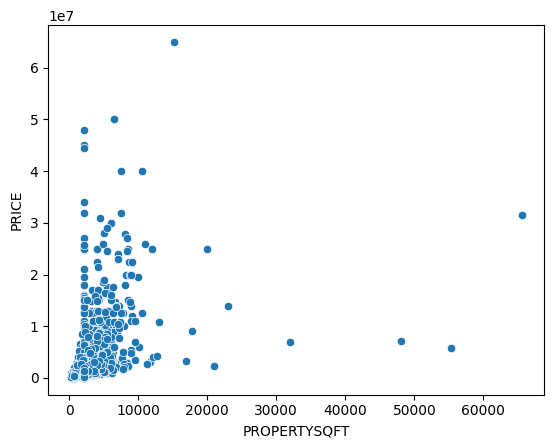

In [ ]:
sns.scatterplot(datos_limpieza1, x="PROPERTYSQFT", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='PRICE'>

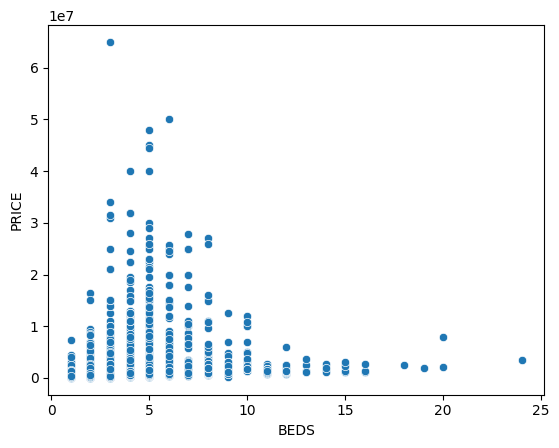

In [ ]:
sns.scatterplot(datos_limpieza1, x="BEDS", y="PRICE" )

<Axes: xlabel='BEDS', ylabel='BATH'>

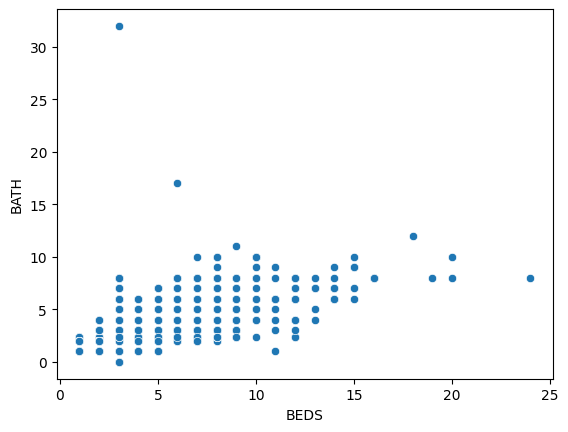

In [ ]:
sns.scatterplot(datos_limpieza1, x="BEDS", y="BATH" )

<Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>

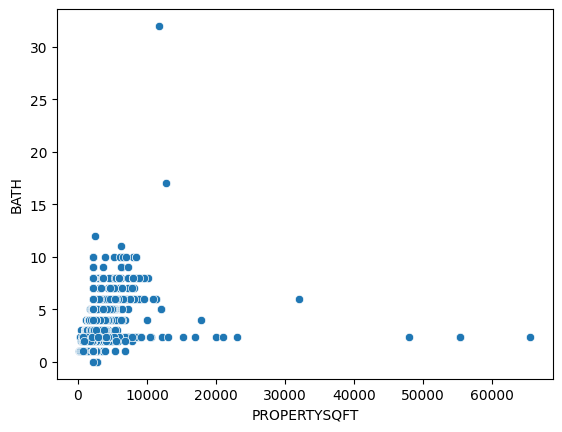

In [ ]:
sns.scatterplot(datos_limpieza1, x="PROPERTYSQFT", y="BATH" )

In [ ]:
datos_limpieza1.corr()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.232331,0.395309,0.403356,0.083046,-0.110886
BEDS,0.232331,1.000000,0.701242,0.320732,-0.061917,0.007894
BATH,0.395309,0.701242,1.000000,0.370695,-0.048301,-0.070368
PROPERTYSQFT,0.403356,0.320732,0.370695,1.000000,0.035312,-0.024536
LATITUDE,0.083046,-0.061917,-0.048301,0.035312,1.000000,0.513767
LONGITUDE,-0.110886,0.007894,-0.070368,-0.024536,0.513767,1.000000


In [ ]:
datos_limpieza1["TYPE"].value_counts()

Co-op for sale                1449
House for sale                1007
Condo for sale                 890
Multi-family home for sale     716
Townhouse for sale             294
Pending                        242
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: TYPE, dtype: int64

Existen 13 tipos de casa, sin embargo, existen muchos tipos de casa que son poco frecuentes, una alternativa puede ser que las categorías con muy poca frecuencia entren a otra categoría.

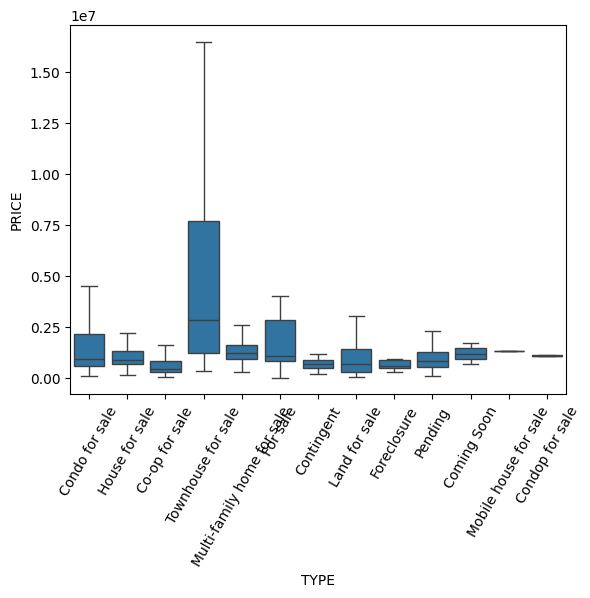

In [ ]:
sns.boxplot(datos_limpieza1, x="TYPE", y= "PRICE",showfliers=False  )
plt.tick_params(axis='x', rotation=60)

In [ ]:
categorias_permanentes= ['Co-op for sale', 'House for sale', 'Condo for sale',
       'Multi-family home for sale', 'Townhouse for sale']
datos_limpieza1["TYPE_MOD"]= np.where(datos_limpieza1["TYPE"].isin(categorias_permanentes), datos_limpieza1["TYPE"], "Other" )

In [ ]:
datos_limpieza1["TYPE_MOD"].value_counts()

Co-op for sale                1449
House for sale                1007
Condo for sale                 890
Multi-family home for sale     716
Other                          421
Townhouse for sale             294
Name: TYPE_MOD, dtype: int64

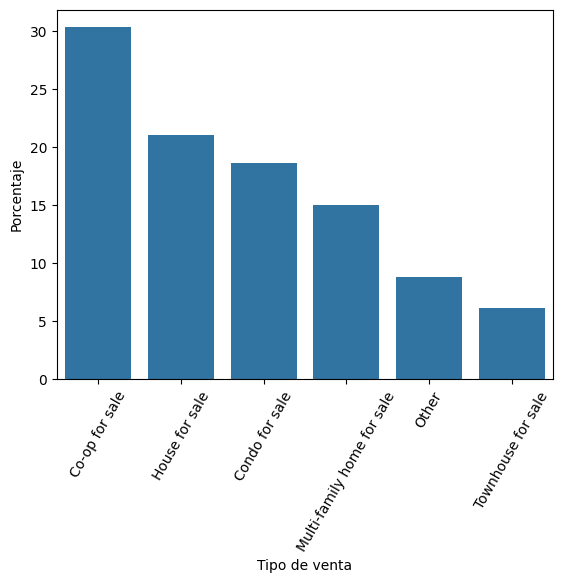

In [ ]:
# Gráfico de barras para la distribución de abandono
sns.barplot( datos_limpieza1["TYPE_MOD"].value_counts(normalize=True)*100 )
plt.xlabel("Tipo de venta" )
plt.ylabel("Porcentaje")
plt.tick_params(axis='x', rotation=60)


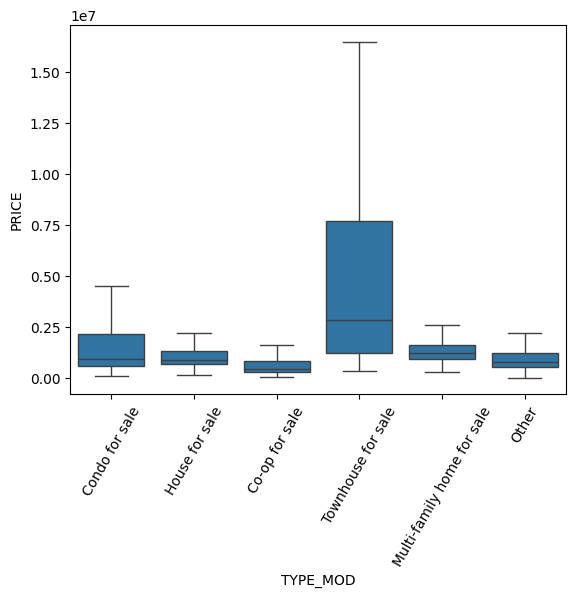

In [ ]:
sns.boxplot(datos_limpieza1, x="TYPE_MOD", y= "PRICE",showfliers=False  )
plt.tick_params(axis='x', rotation=60)

Se puede observa una diferencia en el precio por el tipo de vivienda.




In [ ]:
datos_cluster= datos_limpieza1[['PRICE',	'BEDS',	'BATH',	'PROPERTYSQFT',	'LATITUDE',	'LONGITUDE',
                                "TYPE_MOD"
                                ]]
datos_cluster.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD
0,315000,2,2.0,1400.000000,40.761255,-73.974483,Condo for sale
2,260000,4,2.0,2015.000000,40.541805,-74.196109,House for sale
3,69000,3,1.0,445.000000,40.761398,-73.974613,Condo for sale
5,690000,5,2.0,4004.000000,40.674363,-73.958725,House for sale
6,899500,2,2.0,2184.207862,40.809448,-73.946777,Condo for sale


Finalmente, estas son las variables que se van a utilizar para la segmentación de casas.



## Estandarización de variables

Para realizar la implementación de algoritmos utilizamos la estandarización de variables, pero ¿Qué sucede con la variable TYPE_MOD?  

Realizamos una transformación a variable dummies, que es crear una columna por cada categoría

In [ ]:
datos_numericos = pd.get_dummies(datos_cluster, # Datos
                                 ['TYPE_MOD' ], # Columnas categorícas
                                 )

Con get_dummies, se crea una columna por cada categoría de TYPE_MOD, donde 1 es la categoría de la columna y 0, no lo es.

In [ ]:
datos_numericos

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD_Co-op for sale,TYPE_MOD_Condo for sale,TYPE_MOD_House for sale,TYPE_MOD_Multi-family home for sale,TYPE_MOD_Other,TYPE_MOD_Townhouse for sale
0,315000,2,2.0,1400.000000,40.761255,-73.974483,0,1,0,0,0,0
2,260000,4,2.0,2015.000000,40.541805,-74.196109,0,0,1,0,0,0
3,69000,3,1.0,445.000000,40.761398,-73.974613,0,1,0,0,0,0
5,690000,5,2.0,4004.000000,40.674363,-73.958725,0,0,1,0,0,0
6,899500,2,2.0,2184.207862,40.809448,-73.946777,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4796,599000,1,1.0,2184.207862,40.774350,-73.955879,1,0,0,0,0,0
4797,245000,1,1.0,2184.207862,40.732538,-73.860152,1,0,0,0,0,0
4798,1275000,1,1.0,2184.207862,40.745882,-74.003398,1,0,0,0,0,0
4799,598125,2,1.0,655.000000,40.742770,-73.872752,0,1,0,0,0,0


# Implementación de segmentación

Ahora procedemos a estandarizar las variables y luego implementar diferentes técnicas de clustering.


In [ ]:
scaler = StandardScaler() # Función de estandarización
scaled_features = scaler.fit_transform(datos_numericos) #
pd.DataFrame(scaled_features, columns = datos_numericos.columns)

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD_Co-op for sale,TYPE_MOD_Condo for sale,TYPE_MOD_House for sale,TYPE_MOD_Multi-family home for sale,TYPE_MOD_Other,TYPE_MOD_Townhouse for sale
0,-0.404230,-0.601348,-0.200213,-0.333970,0.535448,-0.327546,-0.659846,2.089836,-0.516826,-0.419894,-0.310883,-0.256088
1,-0.419359,0.344066,-0.200213,-0.049253,-1.966514,-2.518901,-0.659846,-0.478506,1.934888,-0.419894,-0.310883,-0.256088
2,-0.471899,-0.128641,-0.853265,-0.776091,0.537077,-0.328825,-0.659846,2.089836,-0.516826,-0.419894,-0.310883,-0.256088
3,-0.301075,0.816772,-0.200213,0.871562,-0.455211,-0.171730,-0.659846,-0.478506,1.934888,-0.419894,-0.310883,-0.256088
4,-0.243446,-0.601348,-0.200213,0.029082,1.084900,-0.053594,-0.659846,2.089836,-0.516826,-0.419894,-0.310883,-0.256088
...,...,...,...,...,...,...,...,...,...,...,...,...
4772,-0.326107,-1.074055,-0.853265,0.029082,0.684745,-0.143592,1.515505,-0.478506,-0.516826,-0.419894,-0.310883,-0.256088
4773,-0.423485,-1.074055,-0.853265,0.029082,0.208043,0.802928,1.515505,-0.478506,-0.516826,-0.419894,-0.310883,-0.256088
4774,-0.140154,-1.074055,-0.853265,0.029082,0.360176,-0.613440,1.515505,-0.478506,-0.516826,-0.419894,-0.310883,-0.256088
4775,-0.326348,-0.601348,-0.853265,-0.678871,0.324705,0.678344,-0.659846,2.089836,-0.516826,-0.419894,-0.310883,-0.256088


## K-means

Para implementar el algoritmo de K-means, debemos encontrar el número de clústeres. Utilizando el método del codo y el score de la silueta para determinar el número de clúster.


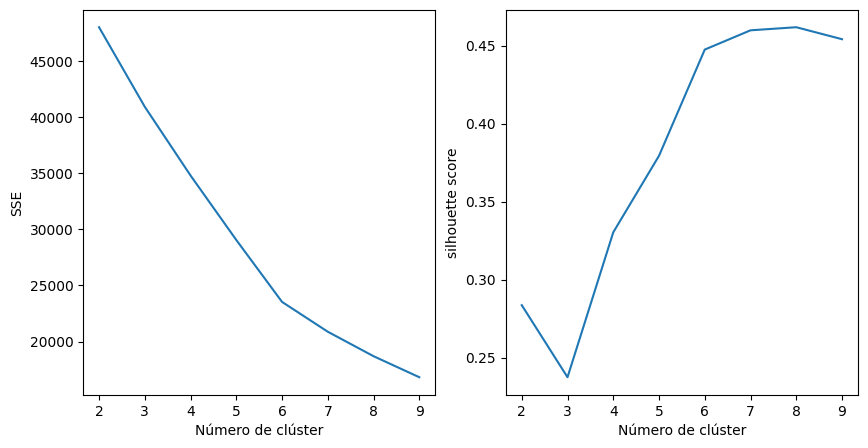

In [ ]:
silueta_score=[]
sse =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  sse.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,sse)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("SSE" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

En este caso observamos con el método de codo para k-means, un número de 6 clúster, como se observa en el silhouette score, un comportamiento diferente, no es un comportamiento similar al SSE, pero a partir del clúster 6 el silhouette score es alto y posteriormente disminuye el score. Para k-means se utilizará 6 clúster.



In [ ]:
k_means=KMeans(6, random_state=123  )
k_means.fit(scaled_features )
datos_limpieza1["labels_k_means"]= k_means.labels_

## K-Medoids

Para implementar el algoritmo de K-Medoids, debemos encontrar el número de clústeres. Utilizando el método del codo y el score de la silueta para determinar el número de clúster.



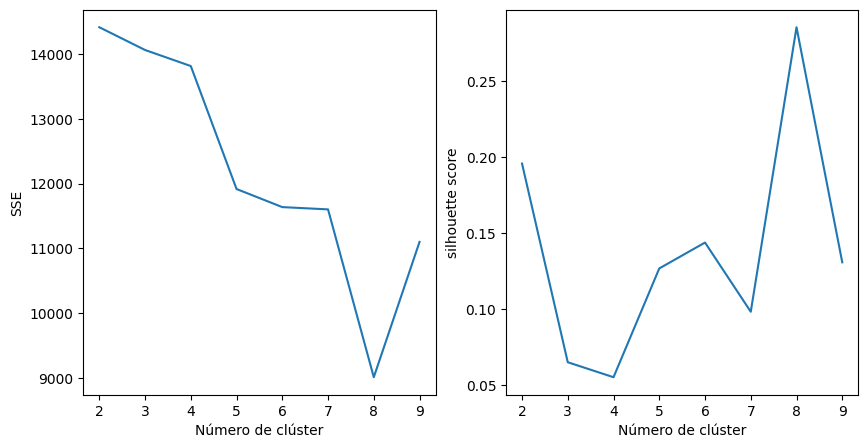

In [ ]:
silueta_score=[]
sse =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMedoids(k)
  k_means.fit(scaled_features)
  sse.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,sse)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("SSE" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

Utilizando el algoritmo de k-medoids, que es la misma implementación de k-means, utiliza la mediana en vez de la media. El comportamiento de SSE no es un comportamiento decreciente para tomar una decisión utilizando una visualización de codo. Podríamos escoger un número de 5 clúster, ya que se minimiza considerablemente el SSE, además el silhoutte score no es el más bajo y no se quiere generar una cantidad alta de clúster.



In [ ]:
k_medios=KMedoids(5,random_state=123 )
k_medios.fit(scaled_features )
datos_limpieza1["labels_k_medios"]= k_medios.labels_

## DB-SCAN

Para implementar el algoritmo de DB-SCAN debemos encontrar el $\epsilon$, y el minimo número de puntos de tal manera que se obtenga un score de silueta alto y el número de clúster no sea 1 y que no sean demasiados clúster.

Text(0.5, 1.0, 'Desempeño de los modelos según el coeficiente de la silueta')

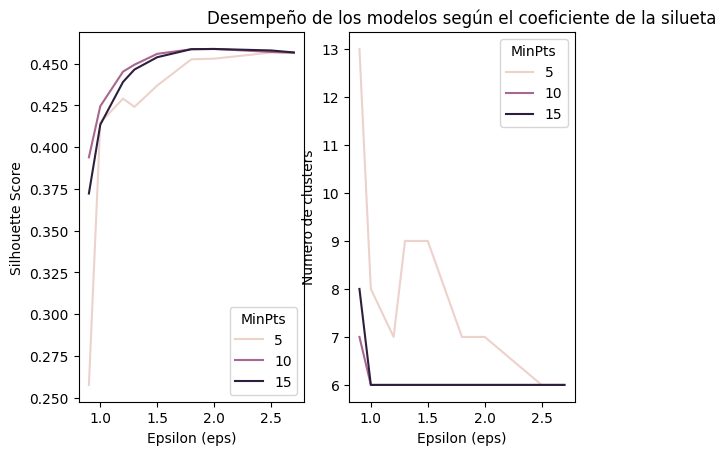

In [ ]:
eps_values = [0.9,1,1.2,1.3,1.5,1.8,2,2.5,2.7]
# eps_values = [0.5,0.6,0.9,1,1.2,1.3]
minPts_values = [5,10,15]
results = []
for i, minPts in enumerate(minPts_values):
    for j, eps in enumerate(eps_values):

        dbscan_model = DBSCAN(eps=eps, min_samples=minPts)
        dbscan_labels = dbscan_model.fit_predict(scaled_features)
        unique_labels = set(dbscan_model.labels_)
        unique_labels.discard(-1)
        num_clusters = len(unique_labels)
        if len(unique_labels) >1:
          silhouette_avg = silhouette_score(scaled_features, dbscan_labels)
        else:
          silhouette_avg=0

        results.append({
            'Epsilon (eps)': eps,
            'MinPts': minPts,
            'Silhouette Score': silhouette_avg,
            'Numero de clusters': num_clusters
        })
results_df= pd.DataFrame(results)
fig, axes = plt.subplots(1, 2)
sns.lineplot(x=results_df['Epsilon (eps)'], y=results_df['Silhouette Score'], hue=results_df['MinPts'], ax=axes[0])
plt.title('Desempeño de los modelos según el coeficiente de la silueta')
sns.lineplot(x=results_df['Epsilon (eps)'], y=results_df['Numero de clusters'], hue=results_df['MinPts'],ax=axes[1] )
plt.title('Desempeño de los modelos según el coeficiente de la silueta')

Se observa que a partir de un epsilon de 1.5 el score llega a su punto máximo, independiente del número mínimo de puntos, el score se maximiza.

Pero se llega a un número mínimo de 6 clúster, se selecciona un epsilon y un minpts de tal manera que se obtengan 6 clúster.



In [ ]:
results_df

,Epsilon (eps),MinPts,Silhouette Score,Numero de clusters
0,0.9,5,0.257581,13
1,1.0,5,0.414747,8
2,1.2,5,0.429088,7
3,1.3,5,0.424124,9
4,1.5,5,0.436918,9
5,1.8,5,0.452653,7
6,2.0,5,0.453020,7
7,2.5,5,0.456678,6
8,2.7,5,0.456466,6
9,0.9,10,0.393926,7


In [ ]:
# dbscan_model = DBSCAN(eps=2.7, min_samples=15)
dbscan_model = DBSCAN(eps=1.8, min_samples=10)
dbscan_model.fit(scaled_features )
datos_limpieza1["labels_dbscan"]= dbscan_model.labels_

## Hierarchical clustering

En Hierarchical clustering se busca una jerarquía de los individuos según la distancia entre ellos. utilizamos gráficos como el dendrograma para visualizar la conformación de grupos que se pueden obtener.

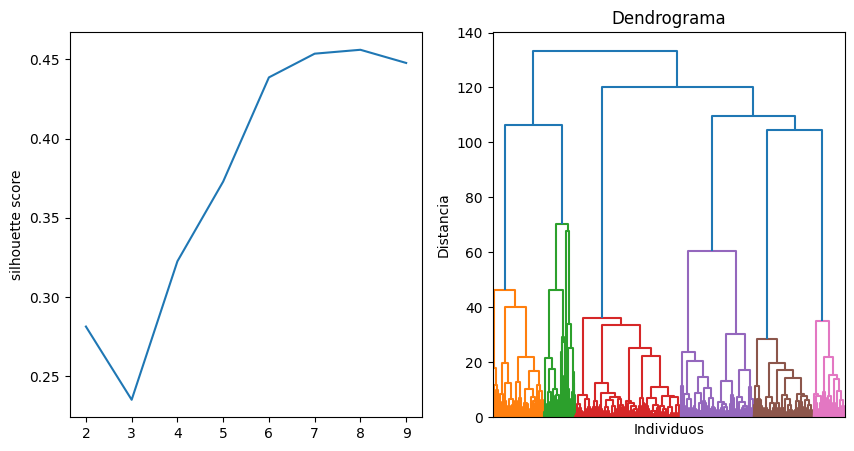

In [ ]:
silueta =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot( list(n_cluster), silueta  )
axes[0].set_ylabel("silhouette score")
# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[1].set_title('Dendrograma')
axes[1].set_xlabel('Individuos')
axes[1].set_ylabel('Distancia')
plt.show()


Para este caso se observa que el número de clústeres ya sea con el score y dendrograma es de 6 clúster.

In [ ]:
hc=AgglomerativeClustering(6 )
hc.fit(scaled_features )
datos_limpieza1["labels_hc"]= hc.labels_

In [ ]:
datos_limpieza1['labels_k_means']=datos_limpieza1['labels_k_means'].astype(str)
datos_limpieza1['labels_k_medios']=datos_limpieza1['labels_k_medios'].astype(str)
datos_limpieza1[ 'labels_dbscan']=datos_limpieza1[ 'labels_dbscan'].astype(str)
datos_limpieza1[ 'labels_hc']=datos_limpieza1[ 'labels_hc'].astype(str)

# Interpretación resultados

Ya implementamos los resultados con 4 modelos diferentes, ahora observaremos que resultados obtenemos por cada modelo.


## K-means

En el algoritmo k-means identificamos 6 clúster. A continuación, vamos a caracterizar los clúster.

1    30.144442
3    20.933640
2    18.379736
0    14.904752
5     8.813063
4     6.824367
Name: labels_k_means, dtype: float64

Text(0.5, 1.0, 'Clúster con K-means')

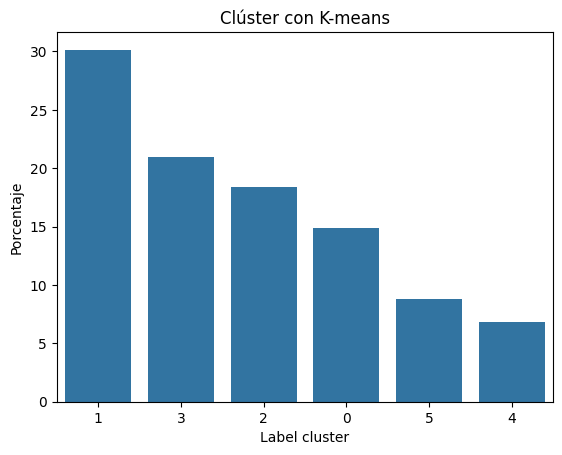

In [ ]:
display(datos_limpieza1['labels_k_means'].value_counts(normalize=True)*100)
sns.barplot( datos_limpieza1['labels_k_means'].value_counts(normalize=True)*100 )
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con K-means")

Text(0.5, 1.0, 'Clúster con k-means 6 clúster')

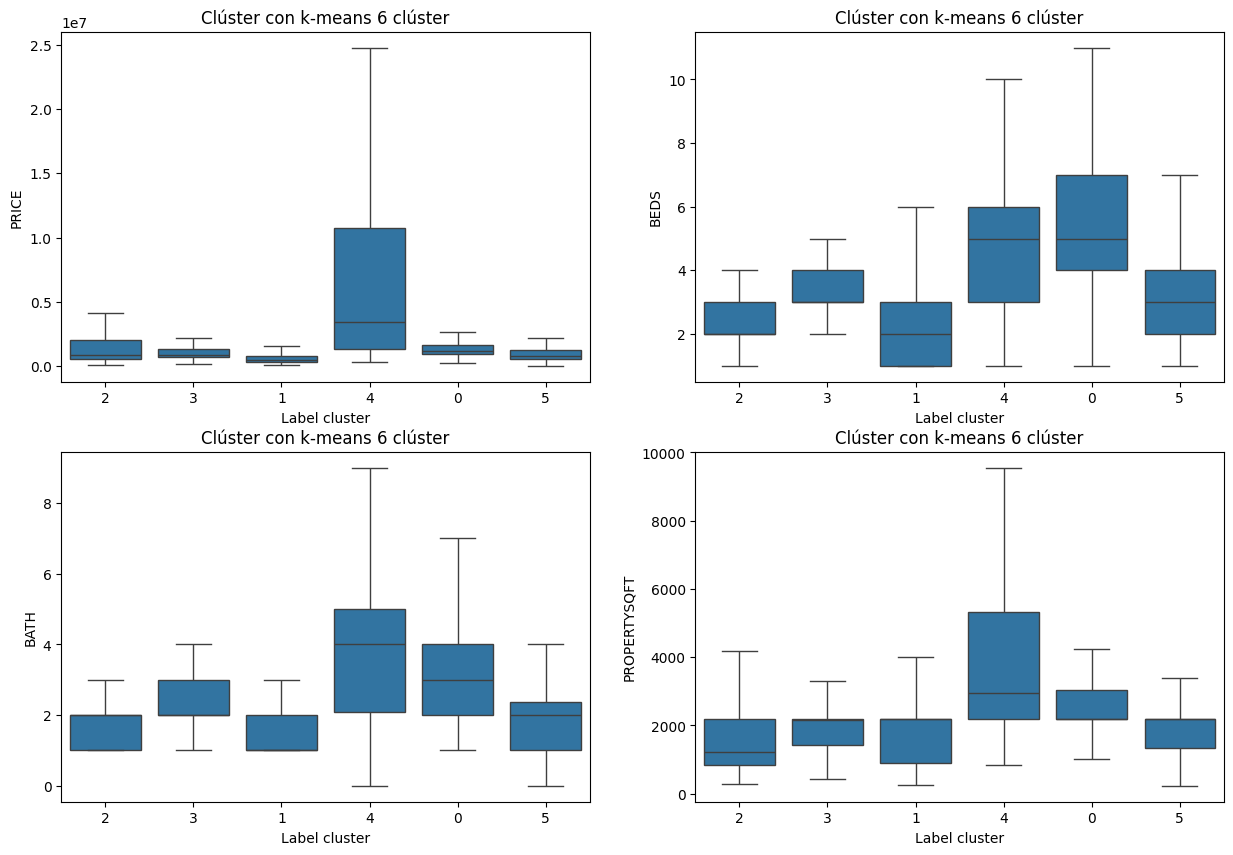

In [ ]:
name_cluster= 'labels_k_means'
titulo = 'Clúster con k-means 6 clúster'
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot( datos_limpieza1, x= name_cluster,y='PRICE' , ax=axes[0,0],showfliers=False )
axes[0,0].set_xlabel("Label cluster")
axes[0,0].set_ylabel('PRICE')
axes[0,0].set_title(titulo)
sns.boxplot( datos_limpieza1, x=name_cluster,y= 'BEDS'  , ax=axes[0,1],showfliers=False )
axes[0,1].set_xlabel("Label cluster")
axes[0,1].set_ylabel('BEDS')
axes[0,1].set_title(titulo)
sns.boxplot( datos_limpieza1, x= name_cluster,y='BATH'  , ax=axes[1,0], showfliers=False)
axes[1,0].set_xlabel("Label cluster")
axes[1,0].set_ylabel('BATH')
axes[1,0].set_title(titulo)
sns.boxplot( datos_limpieza1, x= name_cluster,y= 'PROPERTYSQFT'  , ax=axes[1,1], showfliers=False )
axes[1,1].set_xlabel("Label cluster")
axes[1,1].set_ylabel('PROPERTYSQFT')
axes[1,1].set_title(titulo)

In [ ]:
# incluir outlirs
name_cluster= 'labels_k_means'
titulo = 'Clúster con k-means 6 clúster'
include_outliears='all'
fig = px.box(datos_limpieza1, color=name_cluster, y='PRICE',
             title=titulo, points=include_outliears)
fig.update_xaxes(title_text="Label cluster")
fig.update_yaxes(title_text="PRICE")

fig2 = px.box(datos_limpieza1, color=name_cluster, y='BEDS',
              title=titulo, points=include_outliears)
fig2.update_xaxes(title_text="Label cluster")
fig2.update_yaxes(title_text="BEDS")

fig3= px.box(datos_limpieza1, color=name_cluster, y='BATH', title=titulo,
            points=include_outliears)
fig3.update_xaxes(title_text="Label cluster")
fig3.update_yaxes(title_text="BATH")

fig4= px.box(datos_limpieza1, color=name_cluster, y='PROPERTYSQFT', title=titulo,
            points=include_outliears)
fig4.update_xaxes(title_text="Label cluster")
fig4.update_yaxes(title_text="PROPERTYSQFT")
# Muestra los gráficos
fig.show()
fig2.show()
fig3.show()
fig4.show()


¿Qué observamos?

El clúster 4 destaca por ser el grupo con mayor precio, baños y cantidad de  metros cuadrados en promedio que los demás clúster, donde se debe destacar que existe una pequeña cantidad de casas.

El clúster 0 ocupa un segundo lugar en cuanto a mayor precio, baños y cantidad de metros cuadrados promedio. Pero es el grupo que tiene mayor número de habitaciones promedio.

El clúster 2 ocupa el tercer lugar en cuanto al precio promedio de casas, pero es el clúster con menor cantidad de metros cuadrados promedio.

El clúster 3 presenta un precio promedio similar al clúster 2, sin embargo este es menos variable.

El clúster 5 ocupa un 5 lugar en la categoría de precios ocupa el penultimo lugar.

El clúster 1 es el clúster con menor valor en las variables en general, pero representa un 30% de las casas en venta.

En general parece existir un orden de 4, 0, 2, 3, 5 y 1. Desde casas mas valoradas a menos valoradas (no solo de precio).


La correlación entre PRICE y PROPERTYSQFT es claro que es positiva. Pero ¿Qué sucede en cada clúster?

In [ ]:
datos_limpieza1[['PRICE','PROPERTYSQFT','BEDS','BATH' ] ].corr()

,PRICE,PROPERTYSQFT,BEDS,BATH
PRICE,1.000000,0.403356,0.232331,0.395309
PROPERTYSQFT,0.403356,1.000000,0.320732,0.370695
BEDS,0.232331,0.320732,1.000000,0.701242
BATH,0.395309,0.370695,0.701242,1.000000


In [ ]:
datos_limpieza1.groupby("labels_k_means")[['PRICE','PROPERTYSQFT','BEDS','BATH' ] ].corr()

PRICE  PROPERTYSQFT      BEDS      BATH
labels_k_means                                                         
0              PRICE         1.000000      0.242385  0.121939  0.254783
               PROPERTYSQFT  0.242385      1.000000  0.278707  0.432201
               BEDS          0.121939      0.278707  1.000000  0.489941
               BATH          0.254783      0.432201  0.489941  1.000000
1              PRICE         1.000000      0.378208  0.453424  0.707484
               PROPERTYSQFT  0.378208      1.000000  0.233901  0.333824
               BEDS          0.453424      0.233901  1.000000  0.565999
               BATH          0.707484      0.333824  0.565999  1.000000
2              PRICE         1.000000      0.743573  0.504876  0.695567
               PROPERTYSQFT  0.743573      1.000000  0.594599  0.711818
               BEDS          0.504876      0.594599  1.000000  0.622028
               BATH          0.695567      0.711818  0.622028  1.000000
3              PRICE         1.000000      0.466747  0.241343  0.366539
               PROPERTYSQFT  0.466747      1.000000  0.469062  0.569777
               BEDS          0.241343      0.469062  1.000000  0.575921
               BATH          0.366539      0.569777  0.575921  1.000000
4              PRICE         1.000000      0.263833  0.133047  0.303061
               PROPERTYSQFT  0.263833      1.000000  0.085100  0.081478
               BEDS          0.133047      0.085100  1.000000  0.658741
               BATH          0.303061      0.081478  0.658741  1.000000
5              PRICE         1.000000      0.428394  0.261304  0.410683
               PROPERTYSQFT  0.428394      1.000000  0.534265  0.604765
               BEDS          0.261304      0.534265  1.000000  0.663886
               BATH          0.410683      0.604765  0.663886  1.000000

In [ ]:
px.scatter( datos_limpieza1,x='PROPERTYSQFT', y='PRICE', color= 'labels_k_means'  )

Se observa que la relación entre variables sigue siendo positiva, sin embargo, esta varia según el clúster, cada clúster muestra una tendencia diferente.

In [ ]:
px.scatter( datos_limpieza1,x='LATITUDE', y='LONGITUDE', color= 'labels_k_means'  )

En cuanto a la ubicación geo espacial, no se observa una agrupación especifica, se observa una disperción alta por todos los puntos en cada clúster.

In [ ]:
datos_limpieza1[["TYPE_MOD","labels_k_means"]].value_counts()

TYPE_MOD                    labels_k_means
Co-op for sale              1                 1440
House for sale              3                 1000
Condo for sale              2                  878
Multi-family home for sale  0                  710
Other                       5                  421
Townhouse for sale          4                  294
Condo for sale              4                   12
Co-op for sale              4                    8
House for sale              4                    6
Multi-family home for sale  4                    6
Co-op for sale              0                    1
House for sale              0                    1
dtype: int64

In [ ]:
tabla1=datos_limpieza1[["TYPE_MOD","labels_k_means"]].value_counts().reset_index()
for i in datos_limpieza1["labels_k_means"].unique():
  filtro= tabla1["labels_k_means"]==i
  tabla1.loc[filtro, 0]= tabla1.loc[filtro, 0]/tabla1.loc[filtro, 0].sum()*100
px.bar(tabla1, x='labels_k_means',y=0 , color='TYPE_MOD', barmode='group',labels={'0':"Porcentaje "})

Por otro lado, se observa que las etiquetas tienen asignado un tipo de casa especifico, existen 6 tipos de casa pero estos corresponden al clúster